## The Sparks Foundation - Decision Trees
### Rusali Saha

### Importing all necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

### Importing given dataset and Exploratory Data Analysis(EDA)

In [3]:
data = pd.read_csv('Iris.csv')

In [4]:
data.head(15)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [5]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


#### Now, we check whether our data needs cleaning. For that, we plot a heatmap of our entire dataset, highlighting all null values (if any).

<AxesSubplot:>

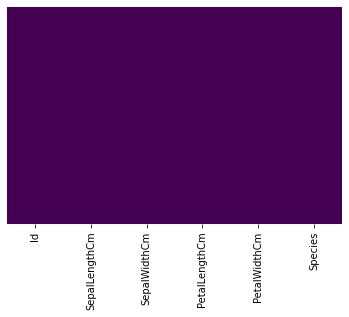

In [8]:
sns.heatmap(data.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

#### Thus, it can be concluded that our dataset doesn't have any NULL values and hence, doesnt require cleaning. Now, we set the ID column as our index.

In [9]:
data = data.set_index("Id")

In [10]:
data.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
6,5.4,3.9,1.7,0.4,Iris-setosa
7,4.6,3.4,1.4,0.3,Iris-setosa
8,5.0,3.4,1.5,0.2,Iris-setosa
9,4.4,2.9,1.4,0.2,Iris-setosa


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


### Plotting data for visualization (EDA)

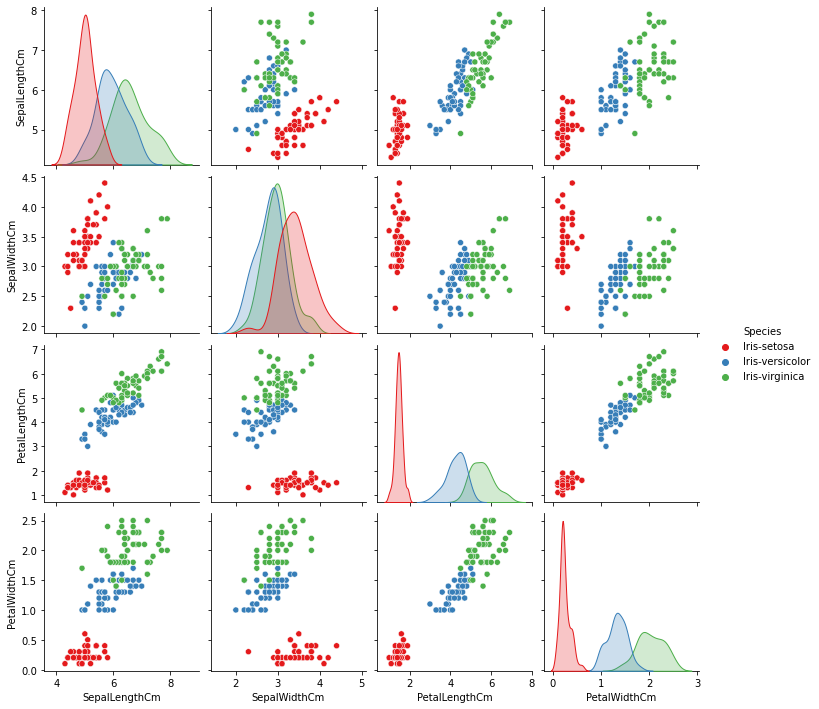

In [12]:
sns.pairplot(data,hue = 'Species', palette = 'Set1')

#### Pairplots can be very useful to understand all possible relationships between all the features in our dataset. From this above pairplot, we can see that the clusters of Species 'versicolor' and 'virginica' are closely related, whereas 'sertosa' is more distinct.

<AxesSubplot:xlabel='Species', ylabel='SepalLengthCm'>

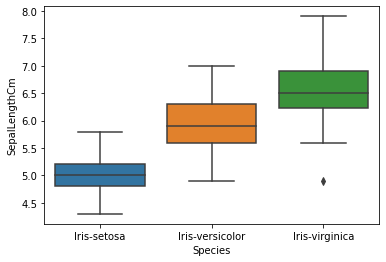

In [13]:
sns.boxplot(x = "Species", y = "SepalLengthCm", data = data)

<AxesSubplot:xlabel='Species', ylabel='PetalWidthCm'>

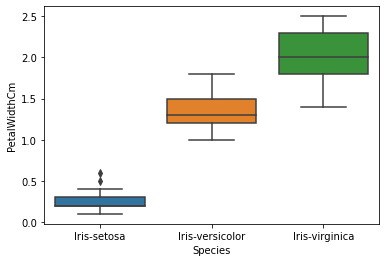

In [14]:
sns.boxplot(x = "Species", y = "PetalWidthCm", data = data)

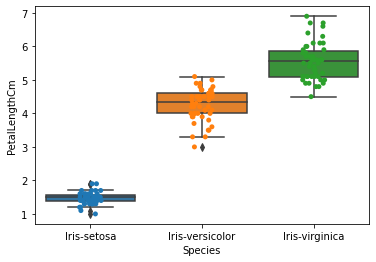

In [17]:
plot= sns.boxplot(x="Species", y="PetalLengthCm", data=data)
plot= sns.stripplot(x="Species", y="PetalLengthCm", data=data, jitter=True, edgecolor="gray")
plt.show()

#### We can plot box plots using a categorical feature against a continuous feature, to understand how our data is distributed over the different features. Here, we have combined a stripplot to identify visible number of outliers also.

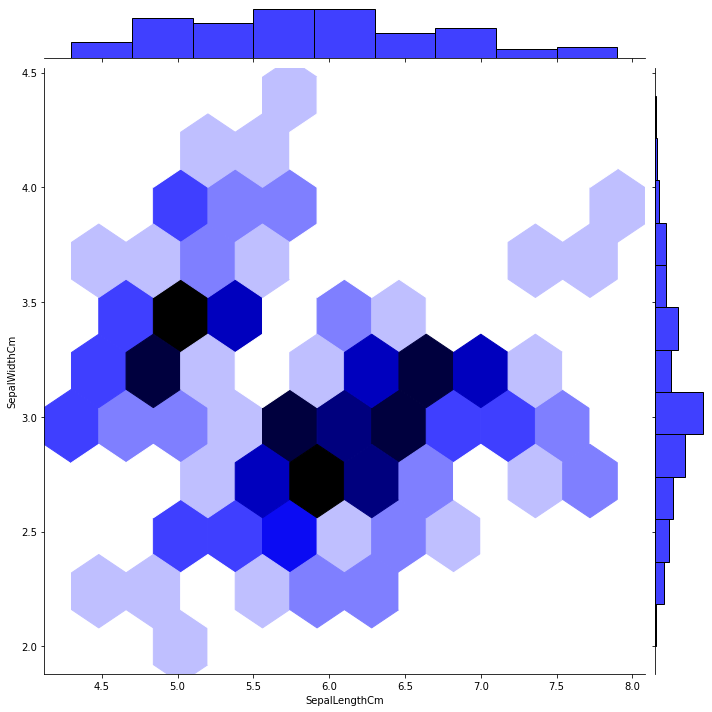

In [20]:
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=data, height=10,ratio=10, kind='hex',color='blue')
plt.show()

#### From the above jointplot, we can find the major areas of concentration of our data points, the darker hexagons refer to higher concentration, lighter hexagons refer to lesser concentration.

### Shuffing the dataset

In [14]:
data = data.sample(frac=1)

In [64]:
data.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
36,5.0,3.2,1.2,0.2,Iris-setosa
18,5.1,3.5,1.4,0.3,Iris-setosa
69,6.2,2.2,4.5,1.5,Iris-versicolor
136,7.7,3.0,6.1,2.3,Iris-virginica
24,5.1,3.3,1.7,0.5,Iris-setosa
108,7.3,2.9,6.3,1.8,Iris-virginica
13,4.8,3.0,1.4,0.1,Iris-setosa
57,6.3,3.3,4.7,1.6,Iris-versicolor
27,5.0,3.4,1.6,0.4,Iris-setosa


### Encoding the target data

In [16]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [17]:
label_encode = LabelEncoder()

In [65]:
data['Encoded Species'] = label_encode.fit_transform(data['Species'])

In [69]:
data.head(15)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Encoded Species
Id,,,,,,
36,5.0,3.2,1.2,0.2,Iris-setosa,0
18,5.1,3.5,1.4,0.3,Iris-setosa,0
69,6.2,2.2,4.5,1.5,Iris-versicolor,1
136,7.7,3.0,6.1,2.3,Iris-virginica,2
24,5.1,3.3,1.7,0.5,Iris-setosa,0
108,7.3,2.9,6.3,1.8,Iris-virginica,2
13,4.8,3.0,1.4,0.1,Iris-setosa,0
57,6.3,3.3,4.7,1.6,Iris-versicolor,1
27,5.0,3.4,1.6,0.4,Iris-setosa,0


### Thus, comparing the last columns following are the labels:
### Iris-setosa   -  0
### Iris-versicolor  -  1
### Iris-virginica   -  2

#### Converting label column into an array

In [68]:
enc_data = label_encode.fit_transform(data['Species'])
enc_data

array([0, 0, 1, 2, 0, 2, 0, 1, 0, 0, 1, 1, 0, 2, 2, 0, 2, 1, 1, 1, 2, 1,
       2, 0, 2, 1, 0, 2, 1, 0, 1, 0, 2, 1, 2, 0, 2, 0, 2, 1, 2, 1, 2, 2,
       2, 0, 2, 0, 1, 2, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 2, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 2, 0, 1, 1, 0, 2, 2, 2, 1, 0, 1, 2, 2, 2, 0,
       0, 1, 0, 1, 2, 0, 1, 1, 1, 0, 2, 1, 1, 2, 2, 2, 0, 2, 1, 1, 1, 1,
       2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 0, 0, 2, 0, 0,
       0, 0, 2, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 0, 0])

### Splitting the data

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X = data.iloc[:,:-1].values
X

array([[5. , 3.2, 1.2, 0.2],
       [5.1, 3.5, 1.4, 0.3],
       [6.2, 2.2, 4.5, 1.5],
       [7.7, 3. , 6.1, 2.3],
       [5.1, 3.3, 1.7, 0.5],
       [7.3, 2.9, 6.3, 1.8],
       [4.8, 3. , 1.4, 0.1],
       [6.3, 3.3, 4.7, 1.6],
       [5. , 3.4, 1.6, 0.4],
       [5.5, 4.2, 1.4, 0.2],
       [6.7, 3.1, 4.7, 1.5],
       [5. , 2.3, 3.3, 1. ],
       [5. , 3.5, 1.6, 0.6],
       [6.3, 3.3, 6. , 2.5],
       [6.7, 2.5, 5.8, 1.8],
       [5.1, 3.7, 1.5, 0.4],
       [6.7, 3. , 5.2, 2.3],
       [6.3, 2.5, 4.9, 1.5],
       [6.4, 2.9, 4.3, 1.3],
       [5.7, 2.9, 4.2, 1.3],
       [6.9, 3.2, 5.7, 2.3],
       [5.6, 3. , 4.1, 1.3],
       [7.6, 3. , 6.6, 2.1],
       [5.4, 3.9, 1.3, 0.4],
       [7.2, 3.2, 6. , 1.8],
       [6. , 2.2, 4. , 1. ],
       [5. , 3. , 1.6, 0.2],
       [7.1, 3. , 5.9, 2.1],
       [5.8, 2.7, 4.1, 1. ],
       [5.7, 3.8, 1.7, 0.3],
       [5.5, 2.3, 4. , 1.3],
       [5.2, 3.5, 1.5, 0.2],
       [6.9, 3.1, 5.4, 2.1],
       [6.6, 3. , 4.4, 1.4],
       [6.3, 3

In [71]:
X.shape

(150, 4)

In [48]:
Y = enc_data
Y

array([0, 0, 1, 2, 0, 2, 0, 1, 0, 0, 1, 1, 0, 2, 2, 0, 2, 1, 1, 1, 2, 1,
       2, 0, 2, 1, 0, 2, 1, 0, 1, 0, 2, 1, 2, 0, 2, 0, 2, 1, 2, 1, 2, 2,
       2, 0, 2, 0, 1, 2, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 2, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 2, 0, 1, 1, 0, 2, 2, 2, 1, 0, 1, 2, 2, 2, 0,
       0, 1, 0, 1, 2, 0, 1, 1, 1, 0, 2, 1, 1, 2, 2, 2, 0, 2, 1, 1, 1, 1,
       2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 0, 0, 2, 0, 0,
       0, 0, 2, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 0, 0])

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100)

### Building the decision tree model, training and predictions

In [50]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
dtree = DecisionTreeClassifier()

In [52]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [53]:
predictions = dtree.predict(X_test)

In [54]:
from sklearn.metrics import classification_report,confusion_matrix

In [55]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.92      1.00      0.96        12
           2       1.00      0.94      0.97        16

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [56]:
print(confusion_matrix(y_test,predictions))

[[17  0  0]
 [ 0 12  0]
 [ 0  1 15]]


### Testing our model on a random test case

In [75]:
trial = np.array([[7.3,2.9,6.3,1.8]])    ## Predicted label should be Iris-virginica

In [77]:
pred_trial = dtree.predict(trial)
pred_trial

array([2])

#### Label 2 belongs to Iris-virginica, hence our prediction is right

### Visualizing the decision tree using Graphviz

In [78]:
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz


In [79]:
import pydotplus

In [83]:
features = list(data.columns[:-2])
features

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

In [84]:
target = list(data.Species.unique())
target

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

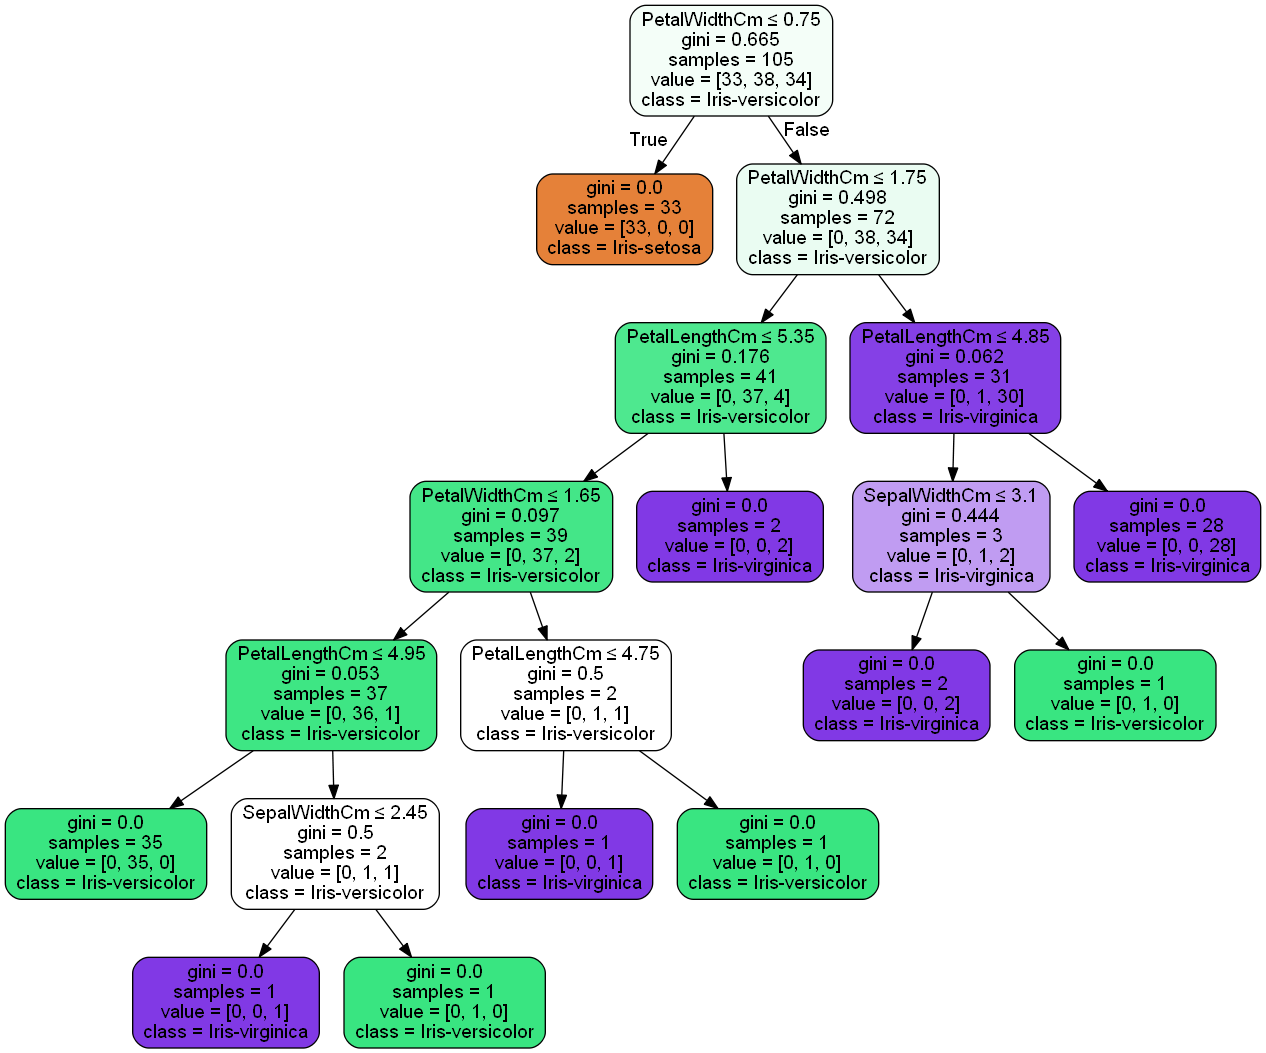

In [85]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True, special_characters=True,class_names=target)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

### We can also visualise the tree using the tree module from sklearn

In [86]:
from sklearn import tree

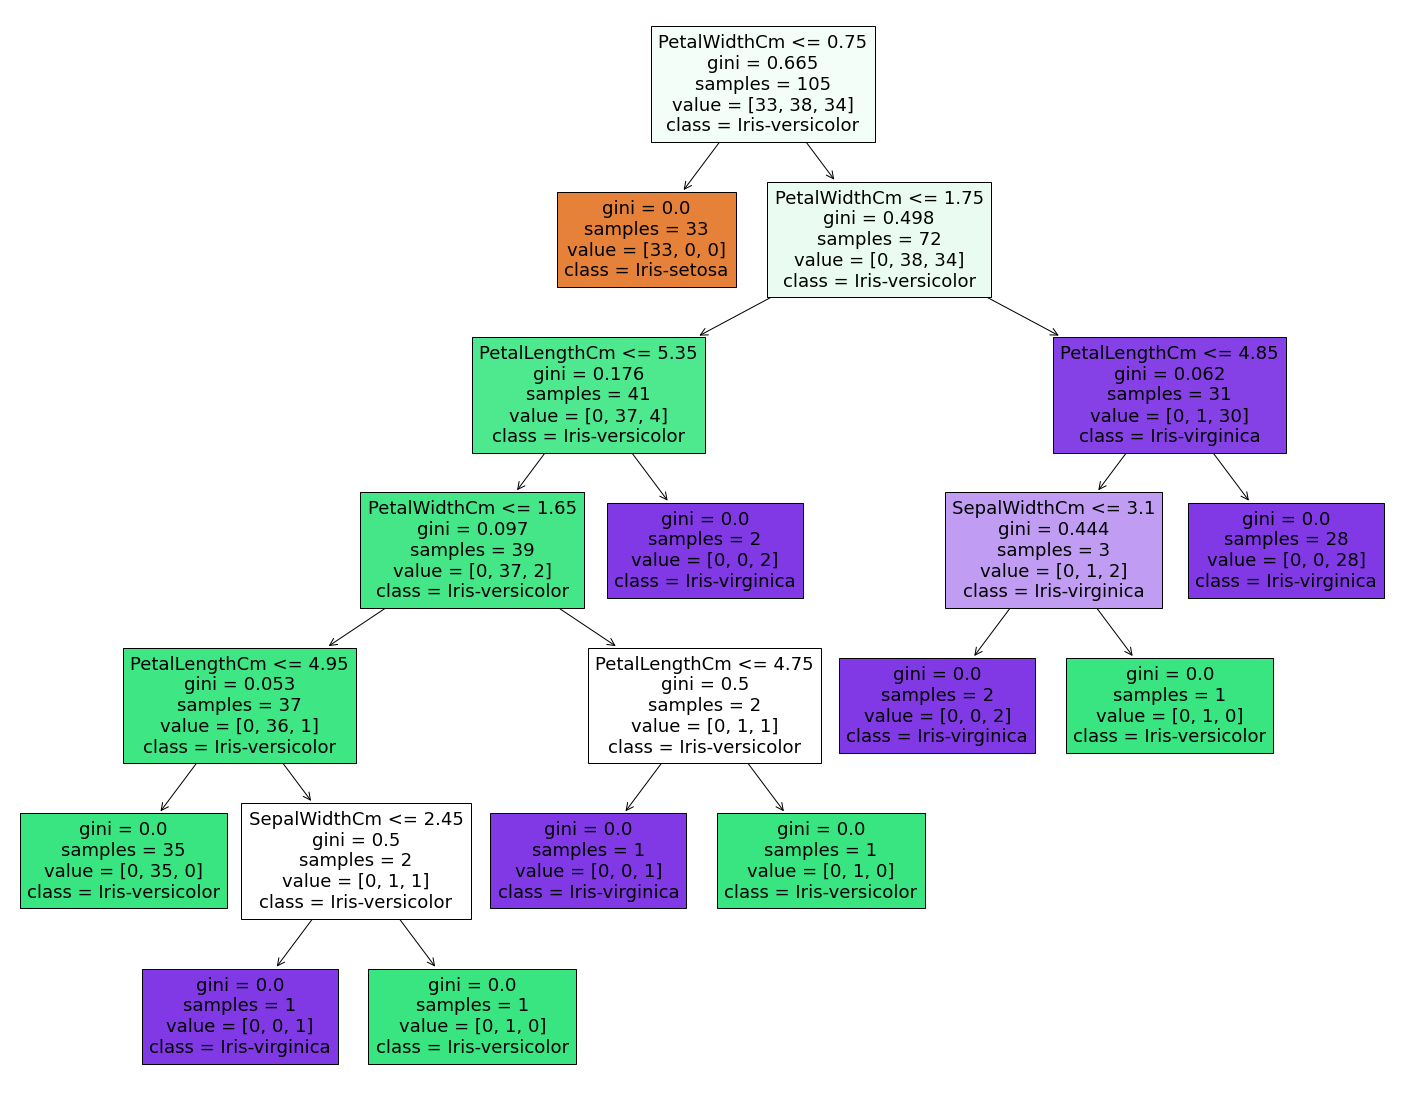

In [87]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtree, 
                   feature_names=features,  
                   class_names=target,
                   filled=True)